In [ ]:
#@title 1. Montar drive (If you are in in colab){ display-mode: "form" }

import os
from google.colab import drive
path =  "/content/drive/My Drive/Colab Notebooks/Python/Proyectos/20201-ai2-class-project"#@param {type:"string"}
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Python/Proyectos/20201-ai2-class-project


In [1]:
#@title 1. Montar drive Elkin (If you are in in colab){ display-mode: "form" }

import os
from google.colab import drive
path =  "/content/drive/My Drive/Proyecto-Artificial-2/20201-ai2-class-project"#@param {type:"string"}
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Proyecto-Artificial-2/20201-ai2-class-project


In [2]:
#@title 2. Load libraries { display-mode: "form" }
import numpy as np
import pandas as pd 
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import json
import os
import tensorflow as tf
from tqdm import tqdm
import seaborn as sb
import seaborn as sns
from nltk.corpus import stopwords
import string
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download('stopwords')
from keras.utils import np_utils


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 3. Descargar datos

In [ ]:
try:
    os.mkdir('data')
except OSError:
    print ("Creation of the directory %s failed")
else:
    print ("Successfully created the directory %s ")
os.chdir('data')
print(os.getcwd())

Successfully created the directory %s 
/content/drive/My Drive/Colab Notebooks/Python/Proyectos/20201-ai2-class-project/data


In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "jamf05" # username from the json file
os.environ['KAGGLE_KEY'] = "33b44029575614b1c82d40d85690cbac" # key from the json file
!kaggle datasets download -d praveengovi/emotions-dataset-for-nlp

  0% 0.00/721k [00:00<?, ?B/s]
100% 721k/721k [00:00<00:00, 46.2MB/s]


>**Nota:** Omitir la descarga si ya tiene el archivo **emotions-dataset-for-nlp.zip**

In [ ]:
!unzip 'emotions-dataset-for-nlp.zip'

Archive:  emotions-dataset-for-nlp.zip
  inflating: test.txt                
  inflating: train.txt               
  inflating: val.txt                 


In [ ]:
os.chdir(path)
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks/Python/Proyectos/20201-ai2-class-project


## 4. Tratamiento de datos

Procedemos a cargar el dataset y a concatenar para armar el compendio de frases y su respectivo sentimiento. Hay que tener en cuenta que tenemos que analizar y categorizar numericamente los datos de `label`, ademas de secuenciar numericamente (`tokenizar`) mis frases.

In [3]:
df_train = pd.read_csv("data/train.txt", delimiter=';', header=None, names=['sentence','label'])
df_val = pd.read_csv("data/val.txt", delimiter=';',header=None, names=['sentence','label'])
df_test = pd.read_csv("data/test.txt", delimiter=';',header=None, names=['sentence','label'])

df_train.shape,df_val.shape,df_test.shape

((16000, 2), (2000, 2), (2000, 2))

In [7]:
#Concatenacion de un gran dataset
df = pd.concat([df_train,df_test,df_val])
df.shape

(20000, 2)

In [8]:
df_train.head()

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


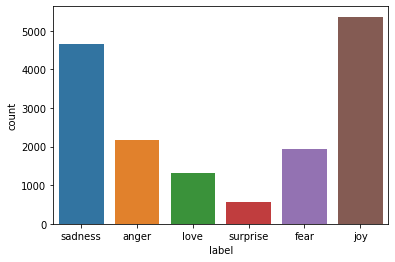

In [9]:
sns.countplot(df_train['label'])

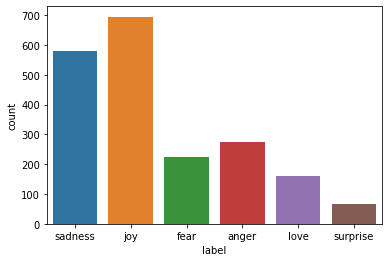

In [10]:
sns.countplot(df_test['label'])

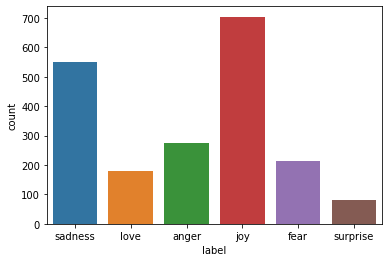

In [ ]:
sns.countplot(df_val['label'])

In [11]:
def text_process(mess):
    """
    Tomamos una cadena de texto y le realizamos lo siguiente
    1. Remueve toda la puntuacion
    2. Remover todas las palabras vacias
    3. Retorna una lista con el texto "limpio"
    """
    # Verificamos los caracteres para ver si poseen algun tipo de en puntuación
    nopunc = [char for char in mess if char not in string.punctuation]

    # Vuelve a unir los caracteres para formar la cadena.
    nopunc = ''.join(nopunc)
    
    # Ahora se eliminan las palabras vacías
    word_seq=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return word_seq

In [12]:
#Aplicamos la funcion de procesamiento al texto a los datos completos y a la division de datos
text = df['sentence'].apply(text_process)
text_train = df_train['sentence'].apply(text_process)
text_val = df_val['sentence'].apply(text_process)
text_test = df_test['sentence'].apply(text_process)

In [14]:
text_train

0                                [didnt, feel, humiliated]
1        [go, feeling, hopeless, damned, hopeful, aroun...
2        [im, grabbing, minute, post, feel, greedy, wrong]
3        [ever, feeling, nostalgic, fireplace, know, st...
4                                       [feeling, grouchy]
                               ...                        
15995    [brief, time, beanbag, said, anna, feel, like,...
15996    [turning, feel, pathetic, still, waiting, tabl...
15997                        [feel, strong, good, overall]
15998                [feel, like, rude, comment, im, glad]
15999                   [know, lot, feel, stupid, portray]
Name: sentence, Length: 16000, dtype: object

In [15]:
max_len = 100
max_words = 20000
#Tokenizamos las palabras, creando un objeto Tokenizer
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(text)
#Genera la sequencias numericas para los conjuntos de datos
sequences_train = tokenizer.texts_to_sequences(text_train)
sequences_val = tokenizer.texts_to_sequences(text_val)
sequences_test = tokenizer.texts_to_sequences(text_test)

In [16]:
#Agregacion del padding a la secuencia
data_train = pad_sequences(sequences_train,maxlen=max_len)
data_val = pad_sequences(sequences_val,maxlen=max_len)
data_test = pad_sequences(sequences_test,maxlen=max_len)

In [18]:
encode=LabelEncoder()

In [29]:
#Comprobacion de los valores de los labels
print(y_train[0:10],df_train.label.values[0:10])
print(y_val[0:10], df_val.label.values[0:10])
print(y_test[0:10], df_test.label.values[0:10])

[4 4 0 3 0 4 5 1 2 3] ['sadness' 'sadness' 'anger' 'love' 'anger' 'sadness' 'surprise' 'fear'
 'joy' 'love']
[4 4 3 0 2 2 2 2 2 4] ['sadness' 'sadness' 'love' 'anger' 'joy' 'joy' 'joy' 'joy' 'joy'
 'sadness']
[4 4 4 2 4 1 0 2 2 0] ['sadness' 'sadness' 'sadness' 'joy' 'sadness' 'fear' 'anger' 'joy' 'joy'
 'anger']


In [19]:
#Procedemos a codificar mi salida en one hot encoding y a trabajar con mis categorias de datos
y_train = encode.fit_transform(df_train['label'])
y_data_train = tf.keras.utils.to_categorical(y_train)
print(y_data_train.shape)

y_val = encode.fit_transform(df_val['label'])
y_data_val = tf.keras.utils.to_categorical(y_val)
print(y_data_val.shape)

y_test = encode.fit_transform(df_test['label'])
y_data_test = tf.keras.utils.to_categorical(y_test)
print(y_data_test.shape)

(16000, 6)
(2000, 6)
(2000, 6)


In [30]:
x_train = data_train
y_train = y_data_train
print("Entrenamiento: ",x_train.shape,y_train.shape)

x_val = data_val
y_val = y_data_val
print("Validacion: ",x_val.shape,y_val.shape)

x_test = data_test
y_test = y_data_test
print("Test: ",x_test.shape,y_test.shape)

Entrenamiento:  (16000, 100) (16000, 6)
Validacion:  (2000, 100) (2000, 6)
Test:  (2000, 100) (2000, 6)


In [31]:
#Representacion del onehot encoding
y_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
#Almacenamiento de los datos munpy
np.save('data/x_train.npy', x_train)
np.save('data/y_train.npy', y_train)
np.save('data/x_val.npy', x_val)
np.save('data/y_val.npy', y_val)
np.save('data/x_test.npy', x_test)
np.save('data/y_test.npy', y_test)

## 5. Montaje de Arquitectura 
Teniendo en cuenta que buscamos predecir un sentimiento dado una sequencia de texto construimos una arquitectura con una celda LSTM, que a nuestro parecer es la mas indicada para trabajar con las oraciones, aunque perfectamente podria ser una RNN debido a que las sequencias no son tan largas, como para los ejemplos de generacion de texto expuestos en la clase. No siendo más se procede con el montaje de la Arquitectura

In [32]:
print('Hola')

Hola


In [35]:
#Funcion para crear el modelo, recibe el max de palabras
def crear_modelo(max_words):
  #Modelo sequencial de agregacion de capas
  model = tf.keras.models.Sequential()
  #Para este caso el word embedding sera relacionado a la dimension de nuestro conjunto de palabras
  model.add(tf.keras.layers.Embedding(max_words,64, input_length=max_len))
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, activation='tanh',name='bilstm_layer1')))
  #Agregamos una capa de Dropout del 20% de las neuronas
  model.add(tf.keras.layers.Dropout(0.2))
  #Capa intermedia densa
  model.add(tf.keras.layers.Dense(units=64,activation=tf.keras.activations.relu))
  #Capa final del onehot Encoding
  model.add(tf.keras.layers.Dense(6,activation=tf.keras.activations.softmax))
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam())
  # Presentacion de la arquitectura
  model.summary()
  return model

Instanciamos el modelo

In [36]:
model = crear_modelo(max_words)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           1280000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               197632    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 1,494,470
Trainable params: 1,494,470
Non-trainable params: 0
_________________________________________________________________


Empezamos el entrenamiento, pero antes definimos las funciones de callbacks, una para detener el entrenamiento cuando no mejore mas y la otra para ir almacenando el modelo luego de cada entrenamiento

In [37]:
!pwd

/content/drive/My Drive/Proyecto-Artificial-2/20201-ai2-class-project


In [38]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('models/sentimiento_modelLSTM_v1.h5', monitor='loss', save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss')

In [39]:
#Definimos una funcion de CALLBACK para detener el modelo cuando 
historial = model.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=150, callbacks=[model_checkpoint,early_stopping])

Epoch 1/150
500/500 [==============================] - 94s 189ms/step - loss: 1.0660 - accuracy: 0.5990 - val_loss: 0.5629 - val_accuracy: 0.8070
Epoch 2/150
500/500 [==============================] - 94s 189ms/step - loss: 0.3044 - accuracy: 0.8982 - val_loss: 0.3175 - val_accuracy: 0.8880
Epoch 3/150
500/500 [==============================] - 94s 188ms/step - loss: 0.1229 - accuracy: 0.9570 - val_loss: 0.3218 - val_accuracy: 0.8940


Grafica de precision de los datos de validacion junto con la perdida y la precision de entrenamiento

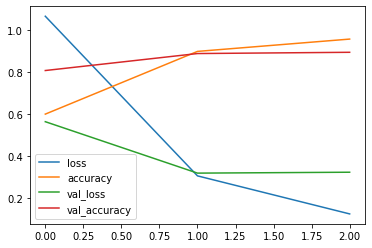

In [42]:
losses=pd.DataFrame(historial.history)
losses.plot()

## 5. Referencias

- Sentiment analysis [[++](https://www.kaggle.com/adithyansukumar/sentiment-analysis)]
- Classify Emotions in text with BERT [[++](https://www.kaggle.com/praveengovi/classify-emotions-in-text-with-bert)]
- 
NLP-News [[++](https://www.kaggle.com/dionesiusap/nlp-news)]
- Where can I get an Emotion Dataset which contains phrases and their associated emotions ? [[++](https://www.researchgate.net/post/Where_can_I_get_an_Emotion_Dataset_which_contains_phrases_and_their_associated_emotions)]
- WASSA-2017 Shared Task on Emotion Intensity (EmoInt) [[++](http://saifmohammad.com/WebPages/EmotionIntensity-SharedTask.html)]